# Лабораторне заняття №8

# Перетворення випадкових величин та векторів
На цьому занятті ми реалізуємо перетворення випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Експоненційний розподіл

### 1.1 Завдання 1

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\eta = 2 \min\{ \xi_1, \xi_2 \}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

$$F_{\eta}(x)=P(\eta<x)=P(2 \min{(\xi_1, \xi_2)}<x)=P( \min{(\xi_1, \xi_2)}<x/2)=1-P( \min{(\xi_1, \xi_2)}\geq x/2)=1-P^2(xi_1\geq x/2)=1-(\int_{x/2}^{\infty}f(t)dt)^2=$$
$$=1-e^{-x}$$
$$f_{\eta}(x)=e^{-x}$$

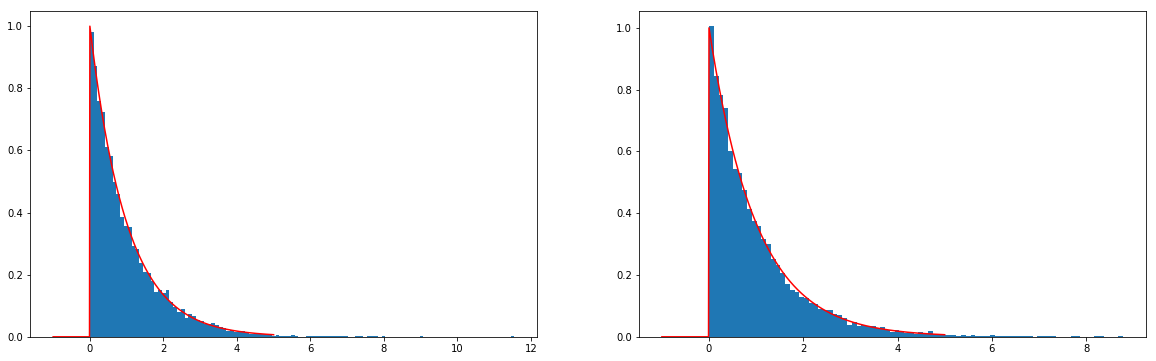

In [19]:
# Місце для Вашого коду
from scipy.stats import expon, uniform
xi1=expon()
xi2=expon()
rvs1=xi1.rvs(10000)
rvs2=xi2.rvs(10000)
x=np.arange(-1, 5+0.01, 0.01)
y=xi1.pdf(x)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
eta=2*np.minimum(rvs1, rvs2)
axs[1].hist(eta, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')
'''def f(x):
    return [0 if el<0 else expon.pdf (el, loc=-1)+expon.pdf (-el, loc=-1) if el<1 else expon.pdf (el, loc=-1) for el in x]
axs[1].plot(x, f(x), 'g')'''
plt.show()

### 1.2 Завдання 2

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\eta = \max\{ \xi_1, \xi_2 \} - \min\{ \xi_1, \xi_2 \}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

$$F_{\eta}(x)=P(\eta<x)=P(\max{(\xi_1, \xi_2)}- \min{(\xi_1, \xi_2)}<x)=P(\max{(\xi_1, \xi_2)}-  \min{(\xi_1, \xi_2)}<x)=$$
$$=1-P( \max{(\xi_1, \xi_2)}- \min{(\xi_1, \xi_2)}\geq x)=1-P( |\xi_1 - \xi_2|\geq x)=$$

$$f_{\eta}(x)=e^{-x}$$

$$𝐹𝜂1(𝑥)=𝑃(𝜂1<𝑥)=𝑃(max(𝜉1,𝜉2)<𝑥)=(\int_{0}^{x}f(t)dt)^2=e^{-2x}-2e^{-x}+e^{0}$$
 

$$𝑓𝜂1(𝑥)=-2𝑒^{−2𝑥}+2𝑒^{−𝑥}$$

$$𝐹𝜂2(𝑥)=𝑃(𝜂2<𝑥)=𝑃(-min(𝜉1,𝜉2)<𝑥)=𝑃(min(𝜉1,𝜉2)>-𝑥)=(\int_{-x}^{\infty}f(t)dt)^2=-e^{2x}+e^{0}$$
 
$$=1−𝑒^{2𝑥}$$
$$𝑓𝜂2(𝑥)=2𝑒^{2𝑥}$$

$$𝑓𝜂(𝑥)=𝑓𝜂1+𝑓𝜂2(x)=\int_{x}^{\infty}2𝑒^{2𝑥-2t}*(-2𝑒^{−2t}+2𝑒^{−t})dt=4\int_{x}^{\infty}(-𝑒^{2𝑥-4t}+𝑒^{2x−3t})dt=$$
$$=𝑒^{2𝑥-4t}-(4/3)𝑒^{2x−3t}=-𝑒^{-2𝑥}+(4/3)𝑒^{-x}$$
$$𝑓𝜂(𝑥)=𝑓𝜂1+𝜂2(x)=\int_{0}^{x}2𝑒^{2t}*(-2𝑒^{−2x+2t}+2𝑒^{−x+t})dt=4\int_{0}^{x}(-𝑒^{-2𝑥+4t}+𝑒^{3t-x})dt=$$
$$=-𝑒^{-2𝑥+4t}+(4/3)𝑒^{3t-x}=-𝑒^{2𝑥}+(4/3)𝑒^{2x}+𝑒^{-2𝑥}-(4/3)𝑒^{-x}$$
$$\mathbf{Зауваження:}$$

Трьома різними способами значення 𝑓𝜂(𝑥) вийшло різним. За графіком бачим, що насправді - це теж Exp(1). Також 𝑓𝜂1, 𝑓𝜂2 - в порівнянні з графіками - знайдено правильно. Формула згортнки дала двічі різний результат, причому неправильний. Це пов'язано хз тим, що min(𝜉1,𝜉2) і max(𝜉1,𝜉2) насправді не є незалежними і формула згортки тут взагалі неприпустима???

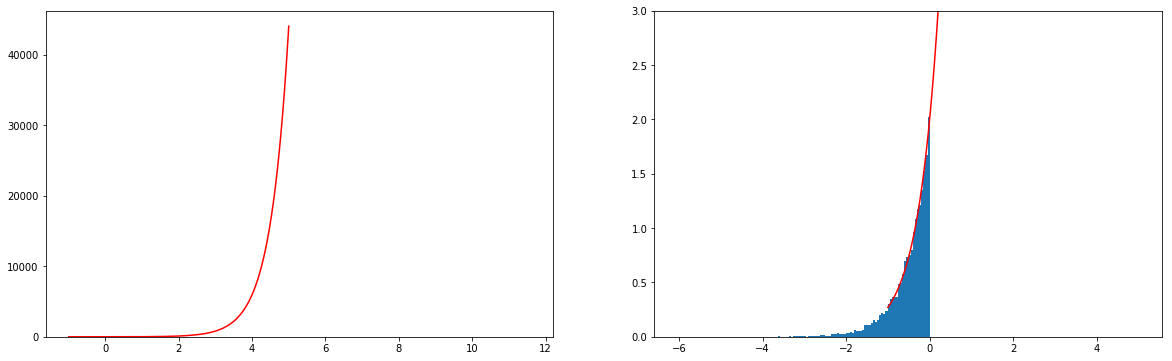

In [30]:
#### Місце для Вашого коду

from scipy.stats import expon, uniform
xi1=expon()
xi2=expon()
rvs1=xi1.rvs(10000)
rvs2=xi2.rvs(10000)
x=np.arange(-1, 5+0.01, 0.01)
y=2*np.e**(2*x)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
eta=-np.minimum(rvs1, rvs2)
axs[1].hist(eta, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')𝑃(max(𝜉1,𝜉2)−min(𝜉1,𝜉2)<𝑥)=
axs[1].plot(x, y, 'r')
axs[1].set_ylim(0, 3)
plt.show()

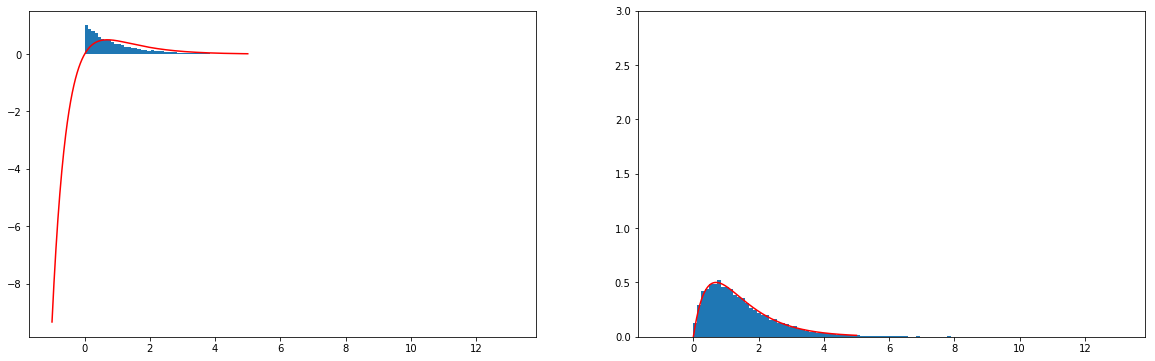

In [36]:
#### Місце для Вашого коду

from scipy.stats import expon, uniform
xi1=expon()
xi2=expon()
rvs1=xi1.rvs(10000)
rvs2=xi2.rvs(10000)
x=np.arange(-1, 5+0.01, 0.01)
y=2*np.exp(-x)-2*np.exp(-2*x)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
eta=np.maximum(rvs1, rvs2)
axs[1].hist(eta, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')𝑃(max(𝜉1,𝜉2)−min(𝜉1,𝜉2)<𝑥)=
axs[1].plot(x, y, 'r')
axs[1].set_ylim(0, 3)
plt.show()

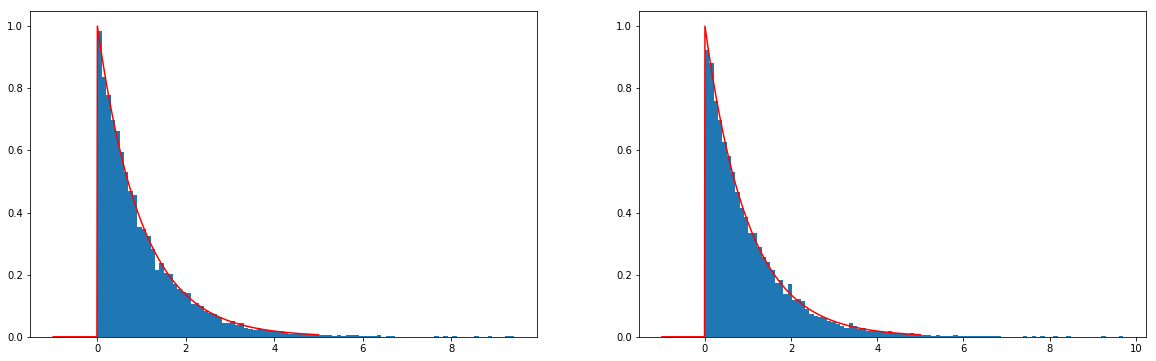

In [37]:
#### Місце для Вашого коду

from scipy.stats import expon, uniform
xi1=expon()
xi2=expon()
rvs1=xi1.rvs(10000)
rvs2=xi2.rvs(10000)
x=np.arange(-1, 5+0.01, 0.01)
y=xi1.pdf(x)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
eta=np.maximum(rvs1, rvs2)-np.minimum(rvs1, rvs2)
axs[1].hist(eta, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')𝑃(max(𝜉1,𝜉2)−min(𝜉1,𝜉2)<𝑥)=
axs[1].plot(x, y, 'r')

plt.show()

### 1.3 Завдання 3

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\eta = \left| \xi_1 - \xi_2 \right|$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

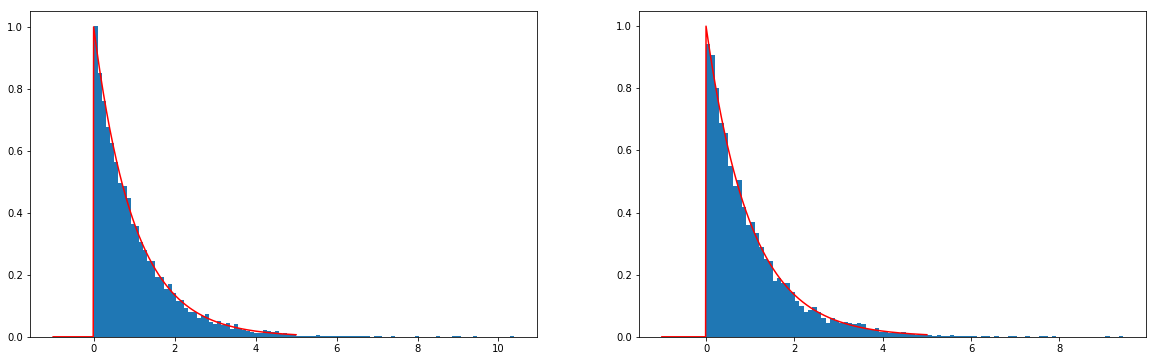

In [21]:
# Місце для Вашого коду
from scipy.stats import expon, uniform
xi1=expon()
xi2=expon()
rvs1=xi1.rvs(10000)
rvs2=xi2.rvs(10000)
x=np.arange(-1, 5+0.01, 0.01)
y=xi1.pdf(x)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))
axs[0].hist(rvs1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[0].plot(x, y, 'r')
eta=abs(rvs1-rvs2)
axs[1].hist(eta, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, y, 'r')

plt.show()


## 2 Нормальний розподіл

### 2.1 Сума нормальних

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Який розподіл має випадкова величина $\eta = \xi_1 + \xi_2$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

$$𝑓𝜂(𝑥)=𝑓\xi1+\xi2(x)=\int_{-\infty}^{\infty}\frac{1}{2\pi}e^{\frac{-t^2-(x-t)^2}{2}}dt=\int_{-\infty}^{\infty}\frac{1}{2\pi}e^{\frac{-2t^2+2tx-x^2}{2}}dt=$$


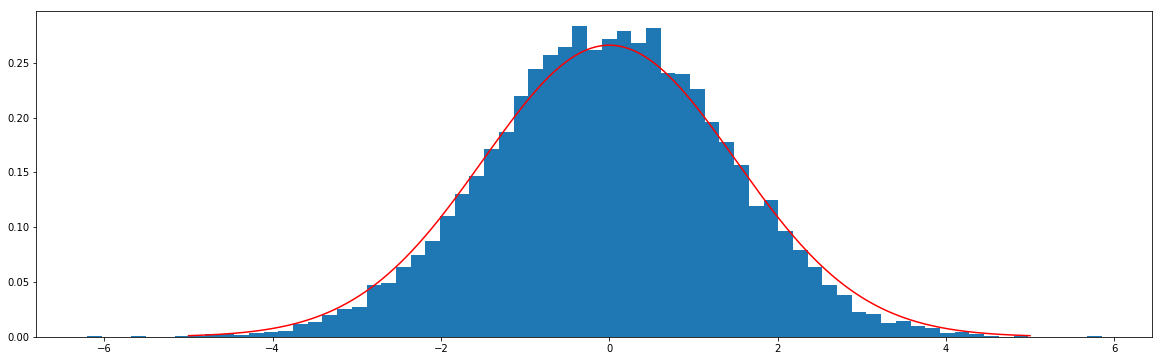

In [48]:
# Місце для Вашого коду


x=np.arange(-5, 5+0.01, 0.01)
from scipy.stats import norm, uniform
xi1=norm()
xi2=norm()
xi1_rvs=xi1.rvs(10000)
xi2_rvs=xi2.rvs(10000)
eta=norm(scale=3/2)
eta_rvs=(xi1_rvs+xi2_rvs)
#print(xi1_rvs/zeta_rvs)
fig, axs=plt.subplots(1, 1, figsize=(20, 6))

axs.hist(eta_rvs, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs.plot(x, eta.pdf(x), 'r')

plt.show()

### 2.2 Перетворення Бокса-Мюллера

Розглянемо дві випадкові величини $\xi_1, \xi_2$ зі стандартного рівномірного розподілу.
Тобто $\xi_1, \xi_2 \sim Uniform(0, 1)$.

Тоді випадкові величини
$$\zeta_1 = \sqrt{-2 \log{\xi_1}} \cos(2 \pi \xi_2)$$,
$$\zeta_2 = \sqrt{-2 \log{\xi_1}} \sin(2 \pi \xi_2)$$
незалежні та мають стандартний нормальний розподіл.
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta_1$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta_1$;
   - функцію щільності випадкової величини $\zeta_1$.
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta_2$;
   - функцію щільності випадкової величини $\zeta_2$.

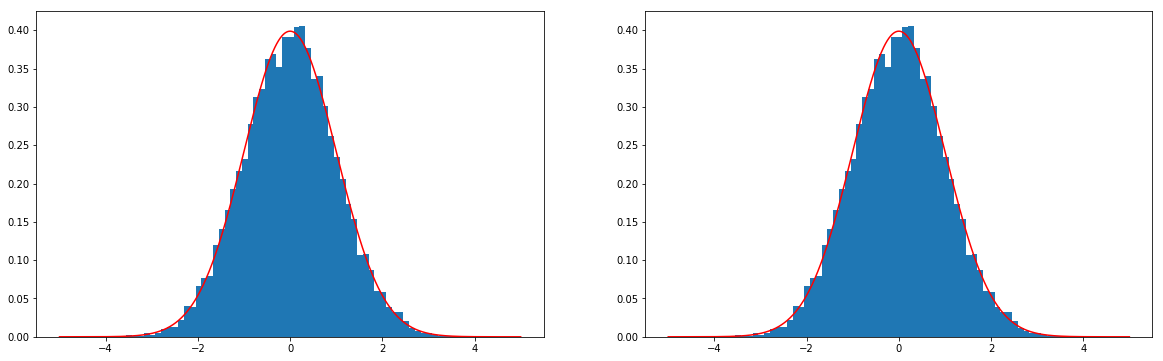

In [59]:
# Місце для Вашого коду

x=np.arange(-5, 5+0.01, 0.01)
from scipy.stats import norm, uniform
xi1=uniform(0,1)
xi2=uniform(0,1)
xi1_rvs=xi1.rvs(10000)
xi2_rvs=xi2.rvs(10000)
zeta1=np.sqrt(-2*np.log(xi1_rvs))*np.cos(2*np.pi*xi2_rvs)
zeta2=np.sqrt(-2*np.log(xi1_rvs))*np.sin(2*np.pi*xi2_rvs)
#print(xi1_rvs/zeta_rvs)
fig, axs=plt.subplots(1, 2, figsize=(20, 6))

axs[0].hist(zeta1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
eta=norm(scale=1)
axs[0].plot(x, eta.pdf(x), 'r')
axs[1].hist(zeta1, density=True, bins='auto')#axs[0].hist(rvs, dencity=True, bins='auto')
axs[1].plot(x, eta.pdf(x), 'r')
plt.show()